<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/supplementary_tables/SupplementaryTable1/Methods_Comparison_all_datasets_scCODA_Sample_Composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ran 20230421
# FixNCUT PRJNA978570 vs. GSE180212, GSE141017, PRJNA835747
# SupplementaryTable1 Methods_comparison_all_datasets

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Instaling Packages

In [2]:
#MUST RUN WITH PYTHON 3.8 NOT 3.9 FOR SKLEARN
!pip install cloudpickle==1.3.0 sccoda scanpy anndata leidenalg pandas==1.5.3 umap-learn==0.5.1 sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 73.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 86.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76548 sha256=4d8a39552838dd3540a6671d025ae1cc1b2e2e48a476dd72f9daf63bf0e36153
  Stored in directory:

In [ ]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122352 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 1s (2,080 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot b

In [ ]:
%%capture
%%!
git clone https://github.com/has2k1/scikit-misc.git
cd scikit-misc
python setup.py install

In [ ]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.10.1 requires pandas>=1.3.5, but you have pandas 1.1.5 which is incompatible.
mizani 0.8.1 requires pandas>=1.3.5, but you have pandas 1.1.5 which is incompatible.


#Load font

In [ ]:
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


# Setup

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/Methods_Comparison/'

samplename="Methods_Comparison_Zhou_v3"
random_state=42

import os
os.chdir(folder)
if not os.path.exists('./figures'):
    os.makedirs('./figures')

# sample composition

In [ ]:
# Setup
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import numpy as np

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz
import scanpy as sc
import scanpy.external as sce
import seaborn as sb
import matplotlib
import matplotlib.pyplot as pl

In [ ]:
pd.set_option('display.max_rows', 10000000)

In [ ]:
pwd

'/content/drive/MyDrive/CIP_v3_data/Methods_Comparison'

In [ ]:
adata=sc.read(samplename+'_QCfilteredNormalized_Harmony_Triku_Neighbors_annotated_20230425.h5ad')
adata.obs['sample'].value_counts()

FixNCut      20026
Protocol3     7341
Protocol1     7267
Protocol2     6624
Name: sample, dtype: int64

In [ ]:
adata.obs['annotated2'].value_counts()

Fibroblast         11724
Acinar              9982
Macrophage / DC     5327
Endothelial         4777
Ductal              3488
T / NK              2219
Fibroblast2         1347
Pericyte             836
B                    752
Endocrine            557
Schwann               86
Mesothelial           83
RBC                   80
Name: annotated2, dtype: int64

In [ ]:
adata.X=adata.layers['PFlog1pPF_normalization']

In [ ]:
color_dict={
    'Acinar':'#D62728',
    'Macrophage / DC': '#4060C8',
    'Fibroblast': '#7AAA6F',
    'Endothelial':'#F4BB44',
    'Neutrophil': '#A1C2ED',
    'Ductal': '#AA40FC',
    'B': '#17BECF',
    'T / NK': '#6996E3',
    'Pericyte': '#CF9FFF',
    'Endocrine': '#8C564B',
    'Schwann': '#C49C94',
    'Mesothelial': '#355E3B',
    'Fibroblast2':'#D3D3D3',}
category_colors = []
for category in adata.obs['annotated2'].cat.categories:
    color = color_dict[category]
    category_colors.append(color)

In [ ]:
adata.obs

In [ ]:
metadata = pd.read_csv('/content/drive/MyDrive/CellRanger_7_Data/W7_CIP/Methods_Comparison_Zhou_v3_donors_final.csv', sep = ',', index_col = 0)


In [ ]:
metadata

,sample,condition
donor,,
control_1,FixNCut,Control
control_2,FixNCut,Control
control_3,FixNCut,Control
control_4,FixNCut,Control
control_5,FixNCut,Control
P_1,Protocol1,Control
S_1,Protocol2,Control
S_2,Protocol2,Control
S_3,Protocol2,Control


#annotated2

In [ ]:
colors_time=[ '#D8527C',  '#8EB3EA', '#4E72D1','purple']

In [ ]:
fm.rcParams['font.family']=['Arial']

In [ ]:
data_scanpy_1 = dat.from_scanpy(
    adata,
    cell_type_identifier="annotated2",
    sample_identifier="donor",
    covariate_df=metadata
)
print(data_scanpy_1)

AnnData object with n_obs × n_vars = 12 × 13
    obs: 'sample', 'condition'
    var: 'n_cells'


In [ ]:
data_scanpy_1.var

,n_cells
annotated2,
Acinar,9982.0
Schwann,86.0
Mesothelial,83.0
Ductal,3488.0
Macrophage / DC,5327.0
B,752.0
Endothelial,4777.0
Endocrine,557.0
Fibroblast,11724.0


In [ ]:
data_scanpy_1.obs

,sample,condition
donor,,
control_1,FixNCut,Control
control_2,FixNCut,Control
control_3,FixNCut,Control
control_4,FixNCut,Control
control_5,FixNCut,Control
P_1,Protocol1,Control
S_1,Protocol2,Control
S_2,Protocol2,Control
S_3,Protocol2,Control


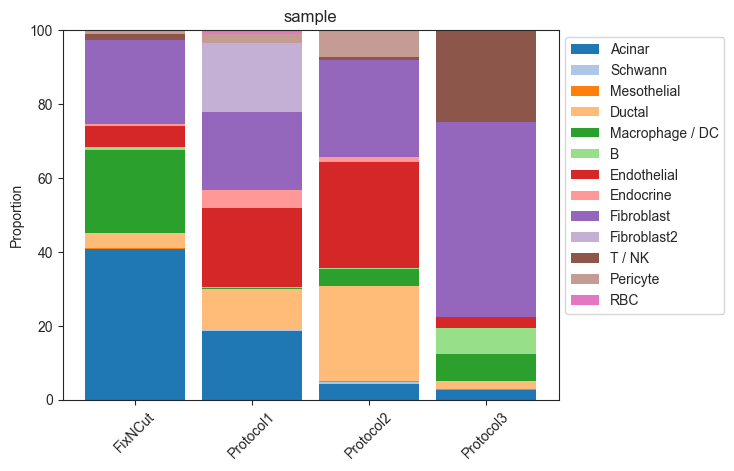

In [ ]:
# Stacked barplot for the levels of "Condition"
viz.stacked_barplot(data_scanpy_1, feature_name="sample")
pl.show()

In [ ]:
cells=['Acinar','Macrophage / DC','Fibroblast',
       'Endothelial','Ductal','T / NK','B',
       'Endocrine','Pericyte','RBC','Schwann','Mesothelial','Fibroblast2']

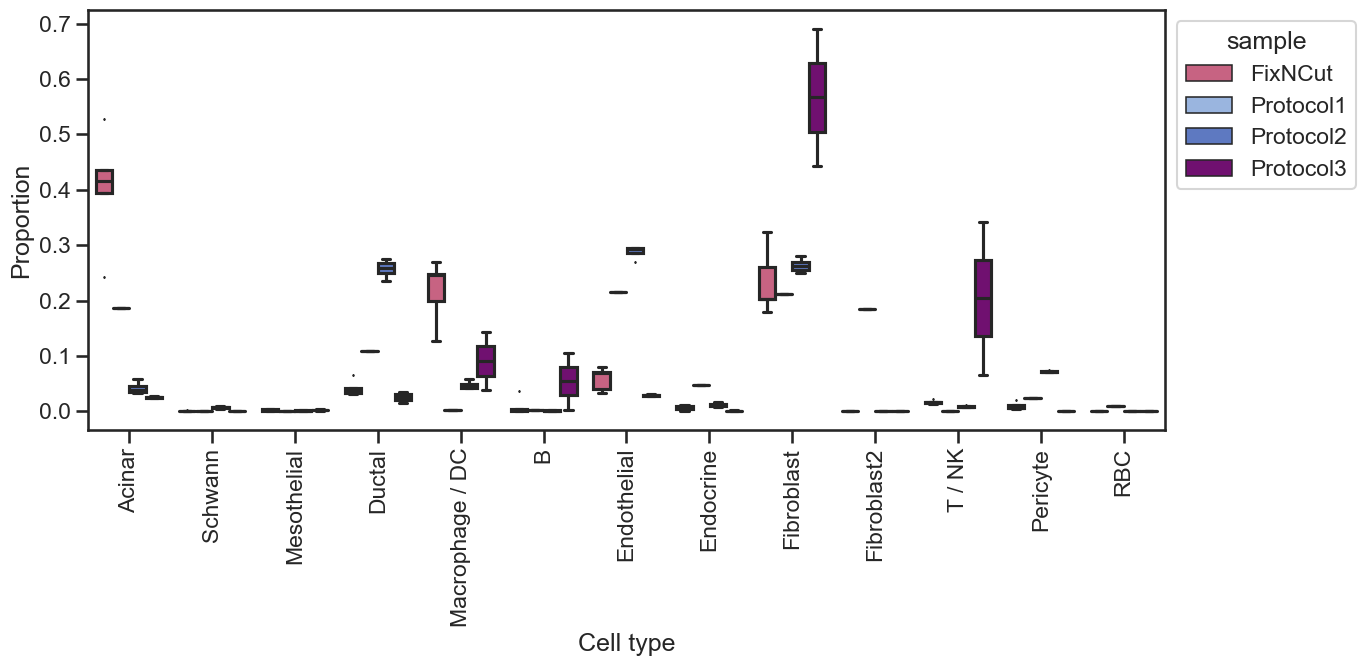

In [ ]:
# Grouped boxplots. No facets, relative abundance, no dots.
sb.set_context('talk')
pl.rcParams['figure.figsize']=(14,7)
viz.boxplots(
    data_scanpy_1,
    feature_name="sample",
    plot_facets=False,
    y_scale="relative",
    add_dots=False,
    cmap=colors_time
)
pl.show()

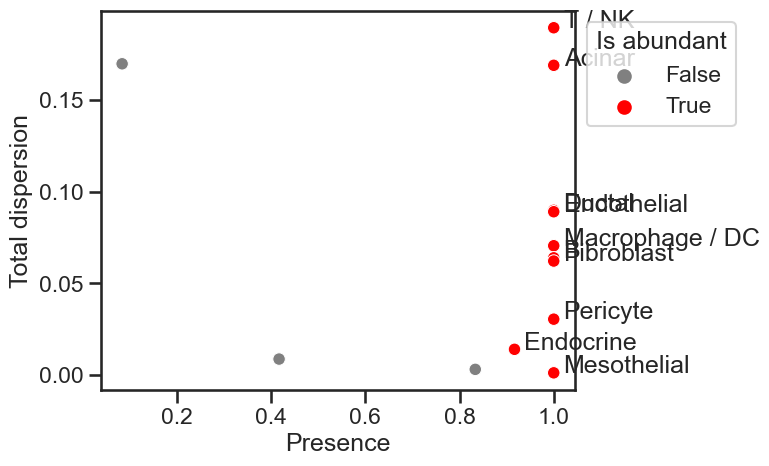

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(8,5)
viz.rel_abundance_dispersion_plot(
    data=data_scanpy_1,
    abundant_threshold=0.9
)
pl.show()

In [ ]:
R = data_scanpy_1

##Treatment = Nissim controls as ref, Pericyte

In [ ]:
model_R = mod.CompositionalAnalysis(R, formula="C(sample, Treatment('FixNCut'))", reference_cell_type="Pericyte")

Zero counts encountered in data! Added a pseudocount of 0.5.


In [ ]:
sim_results = model_R.sample_hmc()

100%|██████████| 20000/20000 [02:50<00:00, 117.50it/s]


MCMC sampling finished. (215.310 sec)
Acceptance rate: 50.8%


In [ ]:
sim_results.summary()

Compositional Analysis summary:

Data: 12 samples, 13 cell types
Reference index: 11
Formula: C(sample, Treatment('FixNCut'))

Intercepts:
                 Final Parameter  Expected Sample
Cell Type                                        
Acinar                     3.441      1319.789456
Schwann                   -0.841        18.232897
Mesothelial               -0.881        17.517975
Ductal                     1.341       161.616703
Macrophage / DC            2.834       719.263304
B                         -0.527        24.958826
Endothelial                1.593       207.935409
Endocrine                 -0.149        36.423986
Fibroblast                 2.942       801.293663
Fibroblast2               -1.506         9.376696
T / NK                     0.322        58.336473
Pericyte                   0.249        54.229633
RBC                       -1.435        10.066645


Effects:
                                                              Final Parameter  \
Covariate          

In [ ]:
path = "Methods_Comparison_Zhou_v3_annotated2_scCODA_20230425"
sim_results.save(path)

In [ ]:
path = "Methods_Comparison_Zhou_v3_annotated2_scCODA_20230425"

In [ ]:
with open(path, "rb") as f:
    sim_results_2 = pkl.load(f)

In [ ]:
import sccoda
import pandas as pd


# Convert the simulation results to a pandas DataFrame
df = pd.DataFrame(sim_results.summary())

# Save the DataFrame to a CSV file
df.to_csv("sim_results_annotated2_20230425.csv", index=False)

Compositional Analysis summary:

Data: 12 samples, 13 cell types
Reference index: 11
Formula: C(sample, Treatment('FixNCut'))

Intercepts:
                 Final Parameter  Expected Sample
Cell Type                                        
Acinar                     3.441      1319.789456
Schwann                   -0.841        18.232897
Mesothelial               -0.881        17.517975
Ductal                     1.341       161.616703
Macrophage / DC            2.834       719.263304
B                         -0.527        24.958826
Endothelial                1.593       207.935409
Endocrine                 -0.149        36.423986
Fibroblast                 2.942       801.293663
Fibroblast2               -1.506         9.376696
T / NK                     0.322        58.336473
Pericyte                   0.249        54.229633
RBC                       -1.435        10.066645


Effects:
                                                              Final Parameter  \
Covariate          

In [ ]:
sim_results_2.summary()

Compositional Analysis summary:

Data: 12 samples, 13 cell types
Reference index: 11
Formula: C(sample, Treatment('FixNCut'))

Intercepts:
                 Final Parameter  Expected Sample
Cell Type                                        
Acinar                     3.441      1319.789456
Schwann                   -0.841        18.232897
Mesothelial               -0.881        17.517975
Ductal                     1.341       161.616703
Macrophage / DC            2.834       719.263304
B                         -0.527        24.958826
Endothelial                1.593       207.935409
Endocrine                 -0.149        36.423986
Fibroblast                 2.942       801.293663
Fibroblast2               -1.506         9.376696
T / NK                     0.322        58.336473
Pericyte                   0.249        54.229633
RBC                       -1.435        10.066645


Effects:
                                                              Final Parameter  \
Covariate          

In [ ]:
sim_results.summary_extended(hdi_prob=0.9)

Compositional Analysis summary (extended):

Data: 12 samples, 13 cell types
Reference index: 11
Formula: C(sample, Treatment('FixNCut'))
Spike-and-slab threshold: 0.804

MCMC Sampling: Sampled 20000 chain states (5000 burnin samples) in 215.310 sec. Acceptance rate: 50.8%

Intercepts:
                 Final Parameter  HDI 5%  HDI 95%     SD  Expected Sample
Cell Type                                                                
Acinar                     3.425   3.055    3.805  0.228      1318.314544
Schwann                   -0.869  -1.481   -0.285  0.370        17.995277
Mesothelial               -0.872  -1.360   -0.346  0.317        17.941372
Ductal                     1.262   0.784    1.742  0.293       151.579364
Macrophage / DC            2.816   2.446    3.225  0.237       717.024019
B                         -0.518  -1.098   -0.016  0.327        25.562063
Endothelial                1.583   1.088    2.035  0.295       208.952999
Endocrine                 -0.161  -0.778    0.36